In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
import matplotlib.pyplot as plt

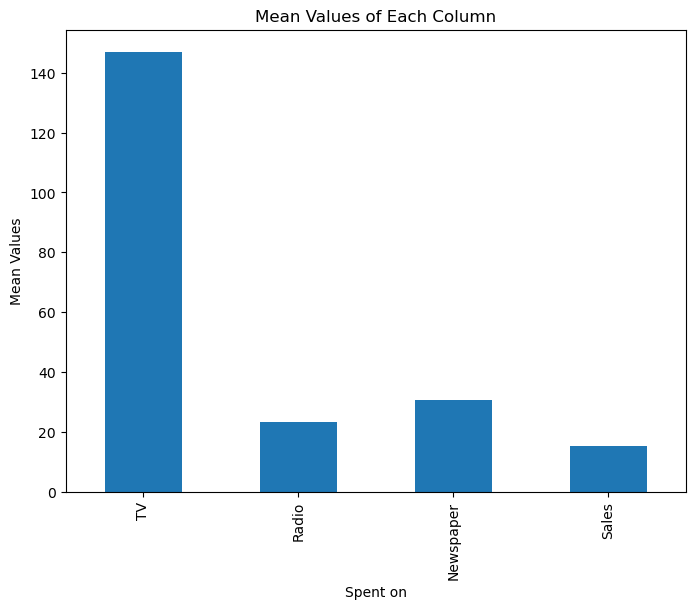

In [8]:
# Assuming 'data' is your DataFrame
# Calculate the mean values of each column
mean_values = data.mean()

# Plotting the mean values as a bar plot using Pandas
mean_values.plot(kind='bar', figsize=(8, 6))  # Set the figure size if needed
plt.xlabel('Spent on')
plt.ylabel('Mean Values')
plt.title('Mean Values of Each Column')  
plt.show()


<Axes: >

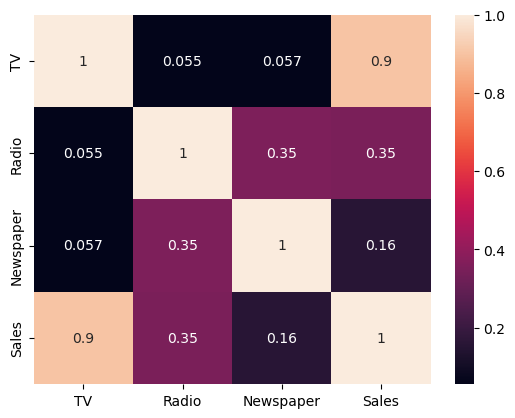

In [9]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [11]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(150, 3)
(50, 3)
(150,)
(50,)


In [13]:
rf=RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=50)

In [20]:
trainpred=rf.predict(x_train)

In [21]:
print(trainpred)

[14.156 17.034  7.212  6.76  10.194 11.792 11.034 25.4    7.36  16.894
 19.856 20.172 12.174  9.086 17.904  6.842 20.126  6.766 13.5    8.662
 11.282 11.494 19.862 17.222 15.778 19.99  14.802 20.6   17.128 22.174
  9.45  14.222 10.932 17.778 11.486 19.876 13.76  25.422 11.026 24.564
  5.878 19.408 23.212 18.426 17.464 16.688 12.78  11.594 20.644 14.136
 17.812 12.478 19.806 11.194 19.414 12.3   11.69  20.474 17.156 18.16
  8.034 22.06  25.224 16.788 18.41  15.044 15.812  8.362 17.844 18.95
 17.212  5.5    3.038 15.18  17.15  20.458 18.212 24.794 17.32  21.584
 17.26  22.94  11.928 20.18  18.156 10.048 16.782 15.564 21.408 19.55
 15.204 17.148 22.544 10.414 11.836 12.234 12.982 18.366  7.516 13.724
 19.808 17.288 16.086  4.728 12.946 18.394 17.406 17.406 23.778  8.704
 26.396 10.962 17.25  25.808 13.938 19.912 11.83  16.708 13.558 23.122
 19.868 12.566 17.506 13.23  16.71   6.172  9.848 14.376 12.814 19.542
 10.596 22.586 10.168  3.048 11.678 19.888 16.618 12.116 15.782 17.264
  7.102 1

In [22]:
testpred=rf.predict(x_test)
print(testpred)

[17.574 22.426 19.938  6.748 22.634 13.266 22.53   9.848 17.168 16.924
  7.278 10.658 17.83   5.252 11.662 16.978  6.702 17.334 11.128 19.686
 20.062 13.088 10.912 22.316 11.094 10.002 22.746 12.574 11.536  5.304
 16.728 10.95  22.92   9.22  20.262 20.306 11.662 19.476 12.562  7.54
 11.726 17.366 10.316  9.984 16.98  10.144 10.782 14.198 12.092 12.034]


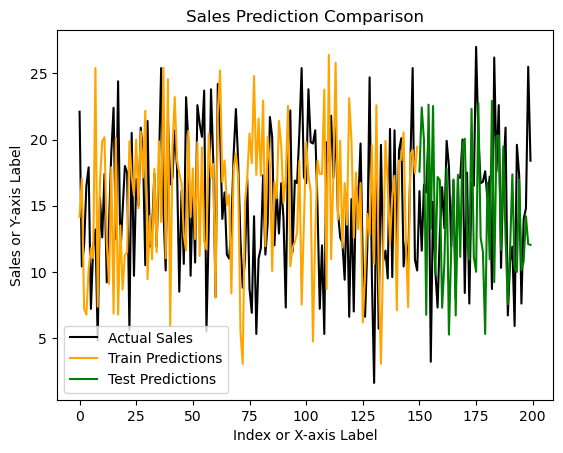

In [25]:
import matplotlib.pyplot as plt


plt.plot(data.index, data['Sales'], c='k', label='Actual Sales')  
plt.plot(data.index[:len(trainpred)], trainpred, c='orange', label='Train Predictions')  
plt.plot(data.index[len(trainpred):], testpred, c='green', label='Test Predictions')  

plt.xlabel('Index or X-axis Label')  
plt.ylabel('Sales or Y-axis Label')  
plt.title('Sales Prediction Comparison')  
plt.legend()  # Show legend

plt.show()


In [23]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,testpred))

0.9069200000000005


In [17]:
import numpy as np
import math
print(math.sqrt(mean_absolute_error(y_test,testpred)))

0.9523234744560277


In [18]:
a=input("Enter expected price spending on TV advertisement:")
b=input("Enter expected price spending on Radio advertisement:")
c=input("Enter expected price spending on Newspaper advertisement:")
features=np.array([[a,b,c]])
print("Expected Sales:",rf.predict(features))

Enter expected price spending on TV advertisement:250
Enter expected price spending on Radio advertisement:50
Enter expected price spending on Newspaper advertisement:125
Expected Sales: [24.734]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
